<a href="https://colab.research.google.com/github/Gayatrii23/actors/blob/main/CollegePlacement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("CollegePlacement.csv")
df.head()
df.shape
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


In [ ]:
x = df.drop(columns=["Placement"])
y = df["Placement"]

In [ ]:
num_cols = x.select_dtypes(include=["int64","float64"]).columns
cat_cols = x.select_dtypes(include=["object"]).columns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Placement', ylabel='count'>

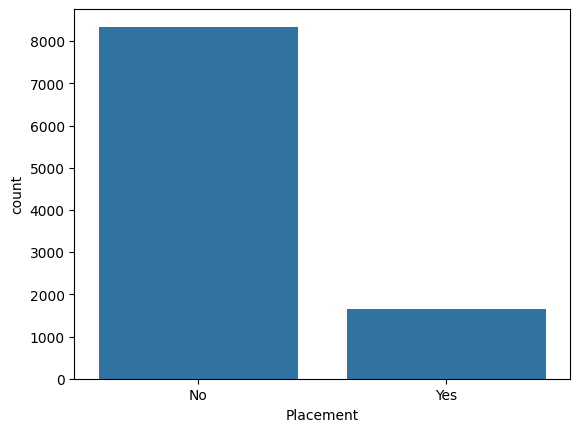

In [ ]:
sns.countplot(data=df,x=y)

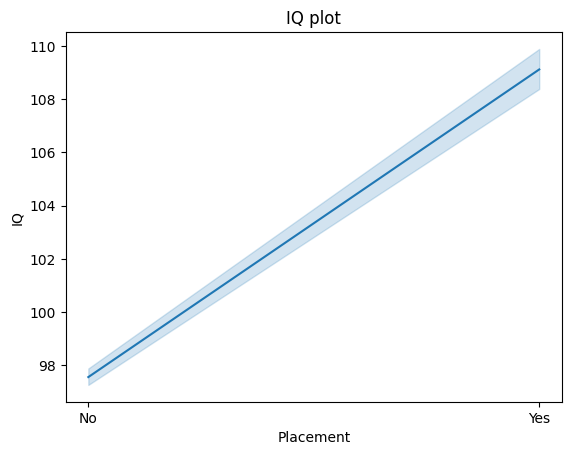

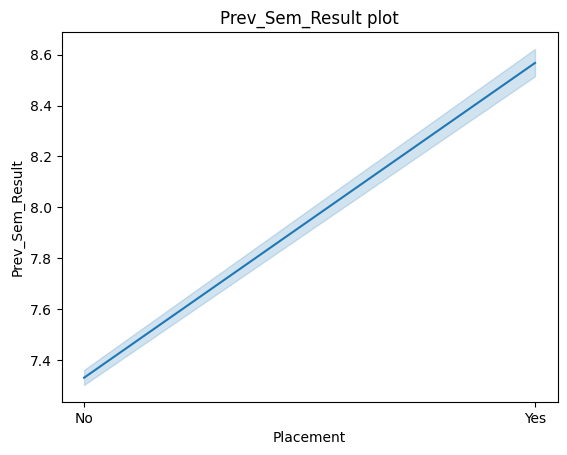

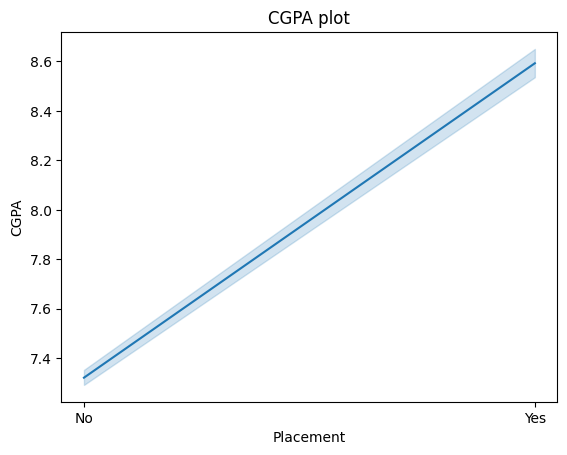

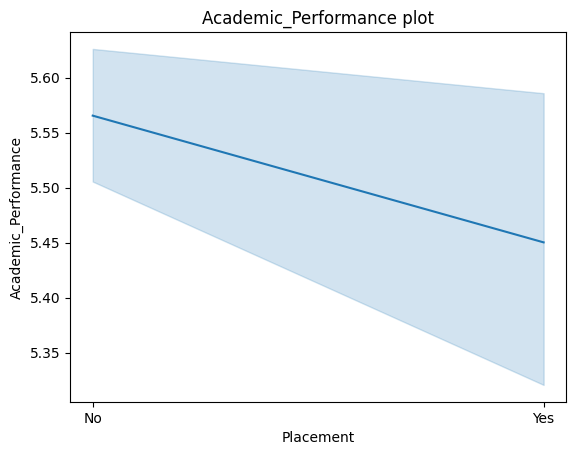

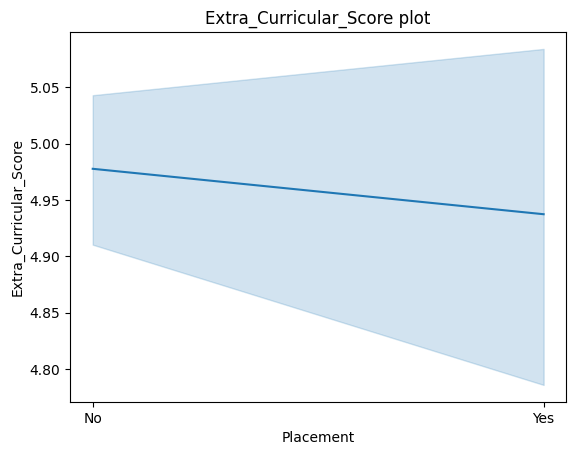

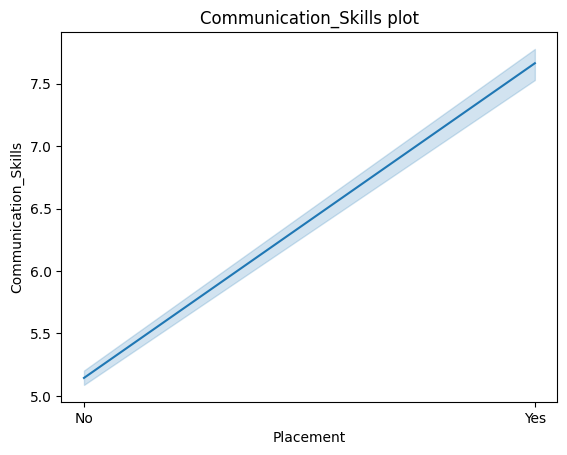

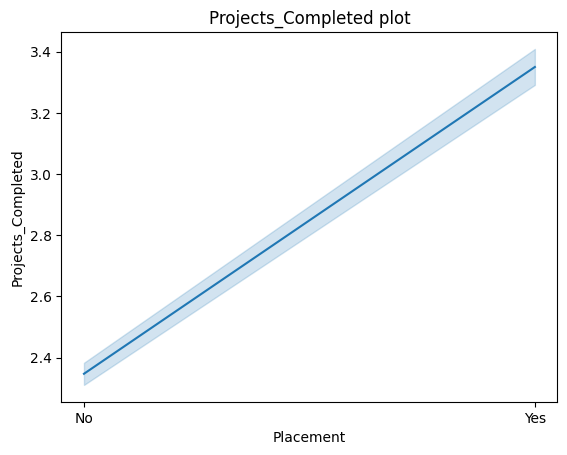

In [ ]:
for col in num_cols:
    sns.lineplot(data=df,x=y,y=col)
    plt.title(f"{col} plot")
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
transformer = ColumnTransformer(transformers=[
    ("ohe",OneHotEncoder(),cat_cols)
],remainder="passthrough")

In [ ]:
x_train = transformer.fit_transform(x_train)

In [ ]:
x_test = transformer.transform(x_test)

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
y_test = le.transform(y_test)

In [ ]:
std = StandardScaler(with_mean=False)

In [ ]:
x_train = std.fit_transform(x_train)

DecisionTree Train Accuracy: 1.0
DecisionTree Train Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5830
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



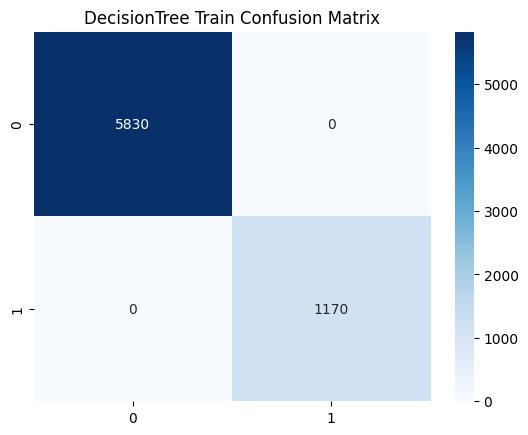

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
DecisionTree Test Accuracy: 0.223
DecisionTree Test Classification report:               precision    recall  f1-score   support

           0       1.00      0.07      0.13      2511
           1       0.17      1.00      0.30       489

    accuracy                           0.22      3000
   macro avg       0.59      0.54      0.21      3000
weighted avg       0.87      0.22      0.16      3000



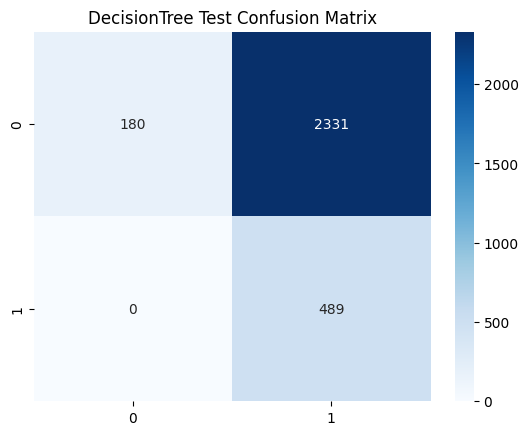

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

dt_train_pred = dt.predict(x_train)
dt_train_acc = accuracy_score(y_train,dt_train_pred)
dt_train_cm = confusion_matrix(y_train,dt_train_pred)
dt_train_cr = classification_report(y_train,dt_train_pred)
print(f"DecisionTree Train Accuracy: {dt_train_acc}")
print(f"DecisionTree Train Classification report: {dt_train_cr}")
sns.heatmap(data=dt_train_cm,annot=True,cmap="Blues",fmt="g")
plt.title("DecisionTree Train Confusion Matrix")
plt.show()

print("--"*200)

dt_test_pred = dt.predict(x_test)
dt_test_acc = accuracy_score(y_test,dt_test_pred)
dt_test_cm = confusion_matrix(y_test,dt_test_pred)
dt_test_cr = classification_report(y_test,dt_test_pred)
print(f"DecisionTree Test Accuracy: {dt_test_acc}")
print(f"DecisionTree Test Classification report: {dt_test_cr}")
sns.heatmap(data=dt_test_cm,annot=True,cmap="Blues",fmt="g")
plt.title("DecisionTree Test Confusion Matrix")
plt.show()

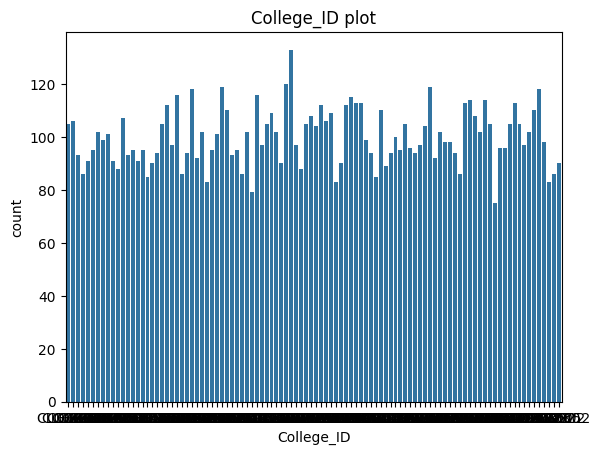

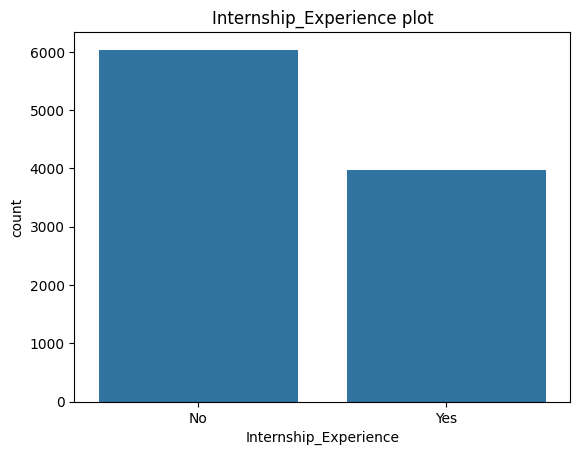

In [ ]:
for col in cat_cols:
    sns.countplot(data=df,x=col)
    plt.title(f"{col} plot")
    plt.show()